In [27]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, log_loss
from sklearn.ensemble import StackingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_val_score, train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss, plot_roc_curve, accuracy_score, roc_auc_score, confusion_matrix, classification_report
from plotnine import *
import janitor
import openpyxl
import seaborn as sns
import datetime

In [49]:
from datetime import datetime

In [50]:
from sklearn import datasets
df = (pd.read_excel(r"C:\\Users\\dean.marris\\Documents\\R\\Harvard\\June_Immersion\drizly.xlsx", sheet_name = 1)
.clean_names()
.encode_categorical(["retailer_id", "order_status", "substitution"])
.reset_index(drop=True)
)
df
#df.drop(columns=['id'], axis = 1, inplace = True)

,retailer_id,delivery_neighborhood_id,order_id,order_date,order_time,order_status,delivery_time,gmv,delivery_fee,substitution
0,1,1,11-00011,2020-03-30,12:05:00,Delivered,34.0,71,4.99,False
1,1,1,11-00012,2020-03-30,12:17:00,Delivered,28.0,156,4.99,False
2,1,1,11-00013,2020-03-30,12:34:00,Delivered,30.0,29,4.99,False
3,1,1,11-00015,2020-03-30,12:55:00,Delivered,30.0,32,4.99,False
4,1,1,11-00014,2020-03-30,12:55:00,Delivered,26.0,80,4.99,False
5,1,1,11-00016,2020-03-30,13:22:00,Delivered,40.0,80,4.99,True
6,1,1,11-00017,2020-03-30,13:56:00,Delivered,28.0,72,4.99,False
7,1,1,11-00018,2020-03-30,14:02:00,Delivered,31.0,25,4.99,False
8,1,1,11-00019,2020-03-30,14:36:00,Delivered,21.0,33,4.99,False
9,1,1,11-00020,2020-03-30,15:06:00,Delivered,28.0,37,4.99,False


In [51]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2320 entries, 0 to 2319
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   retailer_id               2320 non-null   category      
 1   delivery_neighborhood_id  2320 non-null   int64         
 2   order_id                  2320 non-null   object        
 3   order_date                2320 non-null   datetime64[ns]
 4   order_time                2320 non-null   object        
 5   order_status              2320 non-null   category      
 6   delivery_time             2002 non-null   float64       
 7   gmv                       2320 non-null   int64         
 8   delivery_fee              2320 non-null   float64       
 9   substitution              2320 non-null   category      
dtypes: category(3), datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 134.1+ KB


In [53]:
df.describe()

,delivery_neighborhood_id,delivery_time,gmv,delivery_fee
count,2320.0,2002.000000,2320.000000,2.320000e+03
mean,1.0,77.054446,66.358621,4.990000e+00
std,0.0,48.109254,45.521830,1.785623e-13
min,1.0,20.000000,20.000000,4.990000e+00
25%,1.0,36.000000,36.000000,4.990000e+00
50%,1.0,63.000000,54.000000,4.990000e+00
75%,1.0,109.000000,79.000000,4.990000e+00
max,1.0,234.000000,250.000000,4.990000e+00


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2320 entries, 0 to 2319
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   retailer_id               2320 non-null   category      
 1   delivery_neighborhood_id  2320 non-null   int64         
 2   order_id                  2320 non-null   object        
 3   order_date                2320 non-null   datetime64[ns]
 4   order_time                2320 non-null   object        
 5   order_status              2320 non-null   category      
 6   delivery_time             2002 non-null   float64       
 7   gmv                       2320 non-null   int64         
 8   delivery_fee              2320 non-null   float64       
 9   substitution              2320 non-null   category      
dtypes: category(3), datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 134.1+ KB


In [42]:
#df_onehot = pd.get_dummies(df, columns=['Retailer ID'], drop_first = True)

#df_onehot.info()

In [55]:
df.head(20)

,retailer_id,delivery_neighborhood_id,order_id,order_date,order_time,order_status,delivery_time,gmv,delivery_fee,substitution
0,1,1,11-00011,2020-03-30,12:05:00,Delivered,34.0,71,4.99,False
1,1,1,11-00012,2020-03-30,12:17:00,Delivered,28.0,156,4.99,False
2,1,1,11-00013,2020-03-30,12:34:00,Delivered,30.0,29,4.99,False
3,1,1,11-00015,2020-03-30,12:55:00,Delivered,30.0,32,4.99,False
4,1,1,11-00014,2020-03-30,12:55:00,Delivered,26.0,80,4.99,False
5,1,1,11-00016,2020-03-30,13:22:00,Delivered,40.0,80,4.99,True
6,1,1,11-00017,2020-03-30,13:56:00,Delivered,28.0,72,4.99,False
7,1,1,11-00018,2020-03-30,14:02:00,Delivered,31.0,25,4.99,False
8,1,1,11-00019,2020-03-30,14:36:00,Delivered,21.0,33,4.99,False
9,1,1,11-00020,2020-03-30,15:06:00,Delivered,28.0,37,4.99,False


0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
30      0
31      0
32      0
33      0
34      0
35      0
36      0
37      0
38      0
39      0
40      0
41      0
42      0
43      0
44      0
45      0
46      0
47      0
48      0
49      0
50      0
51      0
52      0
53      0
54      0
55      0
56      0
57      0
58      0
59      0
60      0
61      0
62      0
63      0
64      0
65      0
66      0
67      0
68      0
69      0
70      0
71      0
72      0
73      0
74      0
75      1
76      1
77      1
78      1
79      1
80      1
81      1
82      1
83      1
84      1
85      1
86      1
87      1
88      1
89      1
90      1
91      1
92      1
93      1
94      1
95      1
96      1
97      1
98      1
99      1


In [63]:
#Create a weekday number called order_weekly
df['order_weekday'] = df['order_date'].dt.weekday
df.order_weekday

#data Dict to use into for loop to set up the day of week names
days={0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Friday', 5:'Sat', 6:'Sun'}
days

{0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Friday', 5: 'Sat', 6: 'Sun'}

##Creates an empty column in the DF with the a string then for loops inserting the week day number into an actual day

In [61]:

df['day_of_week'] = ''
for i in range(len(df)):
    df['day_of_week'].iloc[i] = days[df['order_weekday'].iloc[i]]

In [62]:
#Test to see days are correct (Not needed in process)
days[df['order_weekday'].iloc[0]]

'Mon'

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2320 entries, 0 to 2319
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   retailer_id               2320 non-null   category      
 1   delivery_neighborhood_id  2320 non-null   int64         
 2   order_id                  2320 non-null   object        
 3   order_date                2320 non-null   datetime64[ns]
 4   order_time                2320 non-null   object        
 5   order_status              2320 non-null   category      
 6   delivery_time             2002 non-null   float64       
 7   gmv                       2320 non-null   int64         
 8   delivery_fee              2320 non-null   float64       
 9   substitution              2320 non-null   category      
 10  order_day                 2320 non-null   int64         
 11  order_weekday             2320 non-null   int64         
 12  day_of_week         

Tuesday


1

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2320 entries, 0 to 2319
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   retailer_id               2320 non-null   category      
 1   delivery_neighborhood_id  2320 non-null   int64         
 2   order_id                  2320 non-null   object        
 3   order_date                2320 non-null   datetime64[ns]
 4   order_time                2320 non-null   object        
 5   order_status              2320 non-null   category      
 6   delivery_time             2002 non-null   float64       
 7   gmv                       2320 non-null   int64         
 8   delivery_fee              2320 non-null   float64       
 9   substitution              2320 non-null   category      
 10  order_day                 2320 non-null   int64         
 11  order_weekday             2320 non-null   int64         
 12  day_of_week         

In [44]:
df.head(100)

,retailer_id,delivery_neighborhood_id,order_id,order_date,order_time,order_status,delivery_time,gmv,delivery_fee,substitution,order_weekday,day_of_week
0,1,1,11-00011,2020-03-30,12:05:00,Delivered,34.0,71,4.99,False,30,
1,1,1,11-00012,2020-03-30,12:17:00,Delivered,28.0,156,4.99,False,30,
2,1,1,11-00013,2020-03-30,12:34:00,Delivered,30.0,29,4.99,False,30,
3,1,1,11-00015,2020-03-30,12:55:00,Delivered,30.0,32,4.99,False,30,
4,1,1,11-00014,2020-03-30,12:55:00,Delivered,26.0,80,4.99,False,30,
5,1,1,11-00016,2020-03-30,13:22:00,Delivered,40.0,80,4.99,True,30,
6,1,1,11-00017,2020-03-30,13:56:00,Delivered,28.0,72,4.99,False,30,
7,1,1,11-00018,2020-03-30,14:02:00,Delivered,31.0,25,4.99,False,30,
8,1,1,11-00019,2020-03-30,14:36:00,Delivered,21.0,33,4.99,False,30,
9,1,1,11-00020,2020-03-30,15:06:00,Delivered,28.0,37,4.99,False,30,


In [39]:
df.order_weekday

0       30
1       30
2       30
3       30
4       30
5       30
6       30
7       30
8       30
9       30
10      30
11      30
12      30
13      30
14      30
15      30
16      30
17      30
18      30
19      30
20      30
21      30
22      30
23      30
24      30
25      30
26      30
27      30
28      30
29      30
30      30
31      30
32      30
33      30
34      30
35      30
36      30
37      30
38      30
39      30
40      30
41      30
42      30
43      30
44      30
45      30
46      30
47      30
48      30
49      30
50      30
51      30
52      30
53      30
54      30
55      30
56      30
57      30
58      30
59      30
60      30
61      30
62      30
63      30
64      30
65      30
66      30
67      30
68      30
69      30
70      30
71      30
72      30
73      30
74      30
75      31
76      31
77      31
78      31
79      31
80      31
81      31
82      31
83      31
84      31
85      31
86      31
87      31
88      31
89      31
90      31

In [40]:
df[['order_weekday', 'day_of_week']].head(1000)

,order_weekday,day_of_week
0,30,
1,30,
2,30,
3,30,
4,30,
5,30,
6,30,
7,30,
8,30,
9,30,


<AxesSubplot:xlabel='order_status', ylabel='count'>

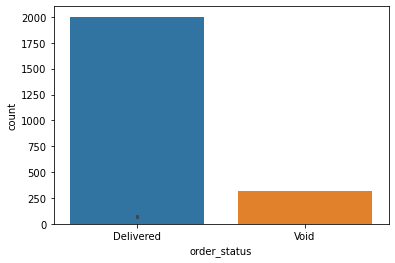

In [38]:
sns.barplot(x= 'order_status', y = 'gmv', data = df)
sns.countplot(x= 'order_status', data = df)


<AxesSubplot:xlabel='order_weekday', ylabel='delivery_time'>

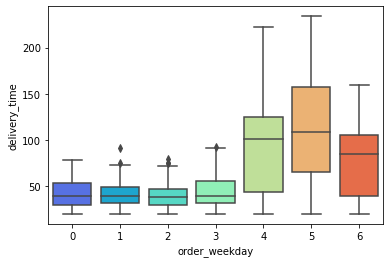

In [94]:
sns.boxplot(x = 'order_weekday', y = 'delivery_time', data = df, palette = 'rainbow' )

<AxesSubplot:xlabel='day_of_week', ylabel='gmv'>

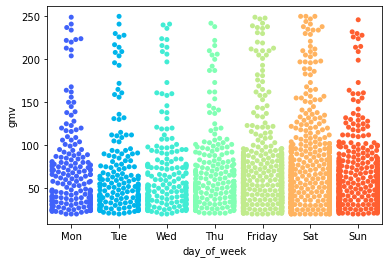

In [146]:
sns.swarmplot(x = 'day_of_week', y = 'gmv', data = df, palette = 'rainbow' )

<AxesSubplot:xlabel='order_weekday', ylabel='delivery_time'>

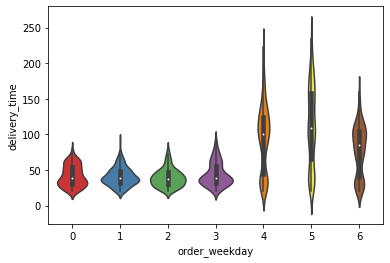

In [83]:
sns.violinplot(x= 'order_weekday', y = 'delivery_time', data = df, palette = 'Set1')